<a href="https://colab.research.google.com/github/Amarmurun0212/Diver/blob/main/finHouse_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [5]:
house_data = pd.read_csv('train.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**[Problem 1] Selection of features for practice**

In [6]:
data = house_data.loc[:,['GrLivArea', 'YearBuilt', 'SalePrice']]

print(data.loc[:,'GrLivArea'].isnull().sum())
print(data.loc[:,'YearBuilt'].isnull().sum())
print(data.loc[:,'SalePrice'].isnull().sum())

X = data.loc[:,['GrLivArea', 'YearBuilt']].to_numpy()
y = data.loc[:, 'SalePrice'].to_numpy()


0
0
0


**[Problem 2] Estimation and evaluation by linear regression**

root mean square error:1845635823.703913
root mean square error:42960.86386123902


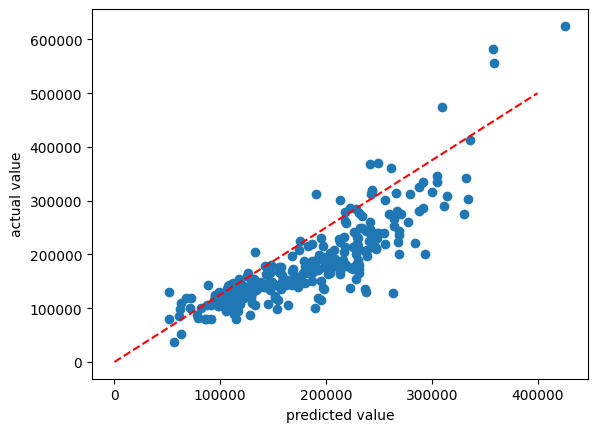

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("root mean square error:{}".format(mse))
mse = mean_squared_error(y_test, y_pred, squared= False)
print("root mean square error:{}".format(mse))

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0, 400000), (0, 500000), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

**[Problem 3] Comparison of methods**

root mean square error:80056.1040697858
root mean square error:54738.61698525918
root mean square error:42894.52001356259


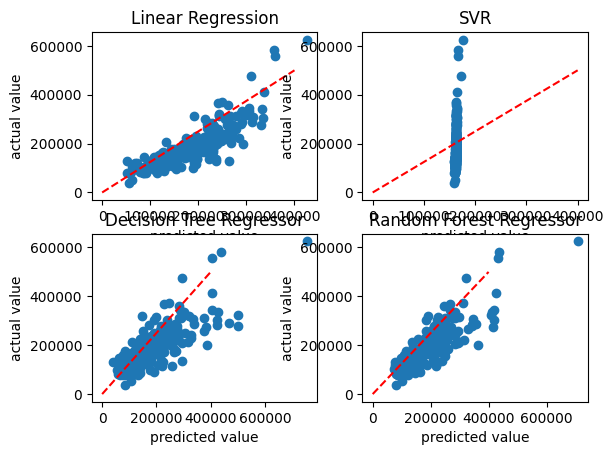

SVM is the worest one while linear regression is the best


In [8]:
svr = SVR(kernel = 'poly')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, svr_pred, squared= False)
print("root mean square error:{}".format(mse))


regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
reg_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, reg_pred, squared= False)
print("root mean square error:{}".format(mse))


rreg = RandomForestRegressor()
rreg.fit(X_train, y_train)
rreg_pred = rreg.predict(X_test)
mse = mean_squared_error(y_test, rreg_pred, squared= False)
print("root mean square error:{}".format(mse))


fig, ax = plt.subplots(2, 2)
ax[0][0].scatter(y_pred, y_test)
ax[0][0].plot((0, 400000), (0, 500000), linestyle='dashed', color='red')
ax[0][0].set_xlabel('predicted value')
ax[0][0].set_ylabel('actual value')
ax[0][0].title.set_text('Linear Regression')
ax[0][1].scatter(svr_pred, y_test)
ax[0][1].plot((0, 400000), (0, 500000), linestyle='dashed', color='red')
ax[0][1].set_xlabel('predicted value')
ax[0][1].set_ylabel('actual value')
ax[0][1].title.set_text('SVR')
ax[1][0].plot((0, 400000), (0, 500000), linestyle='dashed', color='red')
ax[1][0].scatter(reg_pred, y_test)
ax[1][0].set_xlabel('predicted value')
ax[1][0].set_ylabel('actual value')
ax[1][0].title.set_text('Decision Tree Regressor')
ax[1][1].scatter(rreg_pred, y_test)
ax[1][1].plot((0, 400000), (0, 500000), linestyle='dashed', color='red')
ax[1][1].set_xlabel('predicted value')
ax[1][1].set_ylabel('actual value')
ax[1][1].title.set_text('Random Forest Regressor')
plt.show()

print("SVM is the worest one while linear regression is the best") 

**[Problem 4] (Advanced task) Learning using other feature values**

In [9]:
data = house_data.loc[:,['GrLivArea', 'YearBuilt' , 'LotArea','SalePrice']]

print(data.loc[:,'GrLivArea'].isnull().sum())
print(data.loc[:,'YearBuilt'].isnull().sum())
print(data.loc[:,'SalePrice'].isnull().sum())
print(data.loc[:,'LotArea'].isnull().sum())

X = data.loc[:,['GrLivArea', 'YearBuilt', 'LotArea']].to_numpy()
y = data.loc[:, 'SalePrice'].to_numpy()

0
0
0
0


Estimation and evaluation by linear regression

Feature added: root mean square error:1788152399.389184
Feature added: root mean square error:42286.55104627456


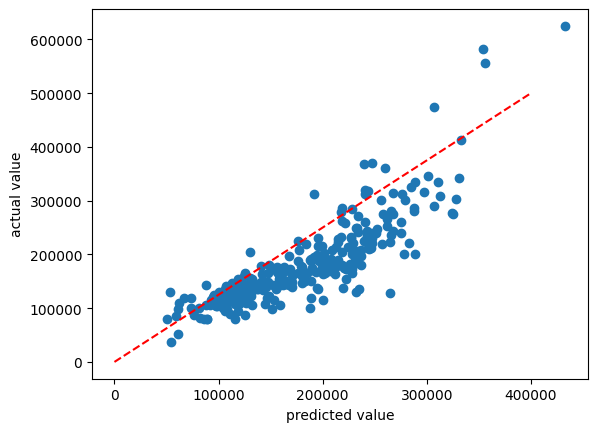

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Feature added: root mean square error:{}".format(mse))
mse = mean_squared_error(y_test, y_pred, squared= False)
print("Feature added: root mean square error:{}".format(mse))

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0, 400000), (0, 500000), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()